# Bar Charts and Analyzing Data from CSVs


Corey Schafer's YT Matplotlib Tutorial: Part 2

Training set: Avocado prices from Kaggle

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [22]:
avocado = pd.read_csv('avocado.csv')
avocado.drop(columns='Unnamed: 0', inplace=True)
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.sort_values(by='Date', ascending=True, inplace=True)
avocado.columns = [x.upper() for x in avocado.columns]
avocado.columns = avocado.columns.str.replace(' ', '_')
avocado.head(10)

,DATE,AVERAGEPRICE,TOTAL_VOLUME,4046,4225,4770,TOTAL_BAGS,SMALL_BAGS,LARGE_BAGS,XLARGE_BAGS,TYPE,YEAR,REGION
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [65]:
plt1 = avocado.groupby('REGION')[['AVERAGEPRICE', 'TOTAL_VOLUME']].median().reset_index()

filt = (plt1['REGION'] < 'N')
plt1 = plt1[filt]

plt1.columns = ['REGION', 'AVERAGEPRICE', 'MEDIAN_VOLUME']

# linear normalization to both statistics
plt1['AVERAGEPRICE'] = (plt1['AVERAGEPRICE'] - plt1['AVERAGEPRICE'].min()) / (plt1['AVERAGEPRICE'].max() - plt1['AVERAGEPRICE'].min())
plt1['MEDIAN_VOLUME'] = (plt1['MEDIAN_VOLUME'] - plt1['MEDIAN_VOLUME'].min()) / (plt1['MEDIAN_VOLUME'].max() - plt1['MEDIAN_VOLUME'].min())



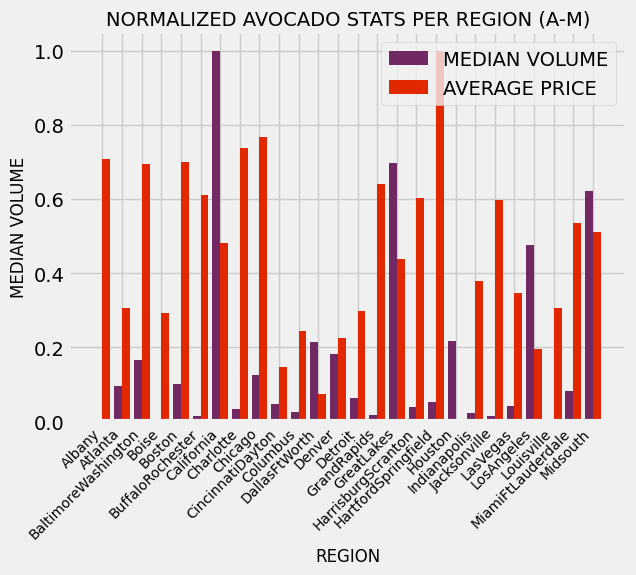

In [66]:
x_axis = np.arange(len(plt1['REGION']))
width = 0.2

plt.style.use('fivethirtyeight')
plt.bar(x_axis - width, plt1['MEDIAN_VOLUME'], color='#702963', label='MEDIAN VOLUME', width=0.4)
plt.bar(x_axis + width, plt1['AVERAGEPRICE'], color='#e12800', label='AVERAGE PRICE', width=0.4)

plt.xlabel('REGION', fontsize=12)
plt.ylabel('MEDIAN VOLUME', fontsize=12)
plt.xticks(ticks=x_axis, labels=plt1['REGION'], rotation=45, fontsize=10, horizontalalignment='right')

plt.legend()
plt.title('NORMALIZED AVOCADO STATS PER REGION (A-M)', fontsize=14)
plt.savefig('normalized_avocado_stats_per_region_a_to_m.png')
plt.show()

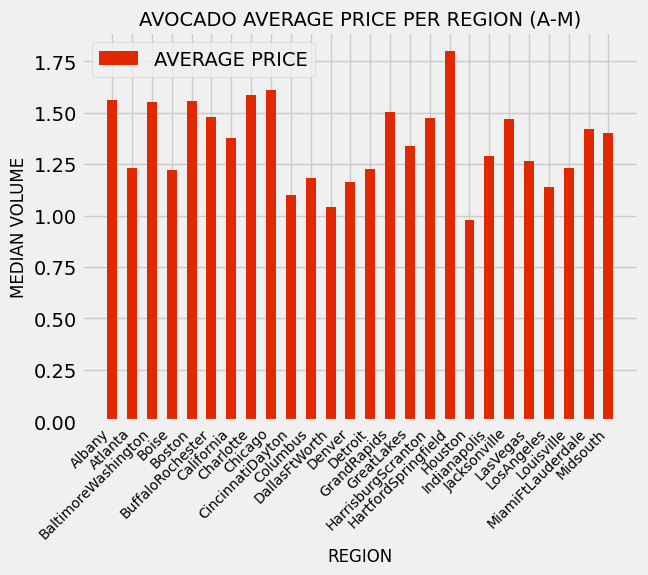

In [58]:
plt.style.use('fivethirtyeight')

plt.xlabel('REGION', fontsize=12)
plt.ylabel('MEDIAN VOLUME', fontsize=12)
plt.xticks(rotation=45, fontsize=10, horizontalalignment='right')

plt.legend()
plt.title('AVOCADO AVERAGE PRICE PER REGION (A-M)', fontsize=14)
plt.savefig('avocado_avg_price_per_region_a_to_m.png')
plt.show()